# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [10]:
import pandas as pd

## imports for Python, Pandas

In [11]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [12]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [13]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [14]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [15]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [16]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [46]:
# change directory
#import os
#os.chdir('C:\LY\springboard\data_wrangling_json\data_wrangling_json')

# import matplotlib
import matplotlib.pyplot as plt

# import pandas
import pandas as pd

In [47]:
# load joson as Pandas dataframe
df = pd.read_json('data/world_bank_projects.json')

## 10 countries with most projects

In [48]:
# check if project is unique
df["project_name"].value_counts().shape

(500,)

In [49]:
# select country columns
countries = df["countryname"]
countries_most_projects = countries.value_counts().head(10)
countries_most_projects

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

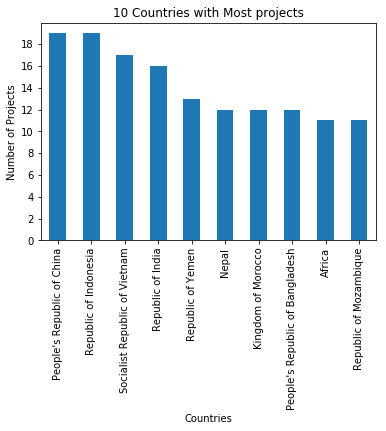

In [50]:
# bar plot to visualize the countries
countries_most_projects.plot(kind="bar")
plt.xlabel("Countries")
plt.yticks([x for x in range(0,20,2)])
plt.ylabel("Number of Projects")
plt.title("10 Countries with Most projects")
plt.show()

# 10 major project themes

In [51]:
#select the theme column
themes = df["mjtheme_namecode"]

In [52]:
# count themes using a dictionary, code number as the key, [numbers , theme name] as the value
themes_count = {} 
for line in themes:
    for theme in line:
        if theme["code"] in themes_count:
            themes_count[theme["code"]][0] += 1
            if  themes_count[theme["code"]][1] == "":
                themes_count[theme["code"]][1] = theme["name"]
        else:
            themes_count[theme["code"]] = [1,theme["name"]]
themes_count

{'8': [210, 'Human development'],
 '11': [250, 'Environment and natural resources management'],
 '1': [38, 'Economic management'],
 '6': [168, 'Social protection and risk management'],
 '5': [77, 'Trade and integration'],
 '2': [199, 'Public sector governance'],
 '7': [130, 'Social dev/gender/inclusion'],
 '4': [146, 'Financial and private sector development'],
 '10': [216, 'Rural development'],
 '9': [50, 'Urban development'],
 '3': [15, 'Rule of law']}

In [54]:
# list of numbers of themes
numbers_of_themes = [value[0] for key, value in themes_count.items()]
# list of the code and name of themes
themes_codeandnames = [{'code': key,'name': value[1]} for key, value in themes_count.items()]
# sort themes_codeandnames based on numbers_of_themes
rank = [x for y,x in sorted(zip(numbers_of_themes,themes_codeandnames))]
# descending
rank.reverse()
# 10 major project themes
result = rank[:10]
result

[{'code': '11', 'name': 'Environment and natural resources management'},
 {'code': '10', 'name': 'Rural development'},
 {'code': '8', 'name': 'Human development'},
 {'code': '2', 'name': 'Public sector governance'},
 {'code': '6', 'name': 'Social protection and risk management'},
 {'code': '4', 'name': 'Financial and private sector development'},
 {'code': '7', 'name': 'Social dev/gender/inclusion'},
 {'code': '5', 'name': 'Trade and integration'},
 {'code': '9', 'name': 'Urban development'},
 {'code': '1', 'name': 'Economic management'}]

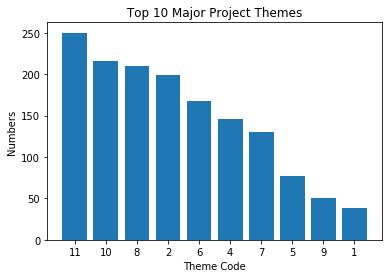

In [29]:
# bar plot to visualize the themes
codes = [x["code"] for x in result]
plt.bar(codes,sorted(themes_rank[:10],reverse=True))
plt.xlabel("Theme Code")
plt.ylabel("Numbers")
plt.title(" Top 10 Major Project Themes ")
plt.show()

## Missing theme names

In [58]:
# using the dictionary themes_count generated above to fill in the missing names
for line in themes:
    for theme in line:
        if  theme["name"] == "":
            theme["name"] = themes_count[theme["code"]][1]                                        

In [37]:
# not sure if this step still needed
df["mjtheme_namecode"] = themes